In [53]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures#多项式扩展用法
from sklearn.pipeline import Pipeline

In [34]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)
warnings.filterwarnings(action = 'ignore', category=UserWarning)


In [35]:
#加载数据
df1 = pd.read_csv('data/winequality-red.csv',sep = ';')
df2 = pd.read_csv('data/winequality-white.csv',sep =';' )
df = pd.concat([df1,df2])
df.dropna(how = 'any')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [81]:
X = df.iloc[:,0:11]
Y = df['quality']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.01,random_state = 0)

In [82]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [83]:
## 创建模型列表
models = [
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LinearRegression())
        ])]
''',
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', RidgeCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', LassoCV(alphas=np.logspace(-4, 2, 20)))
        ]),
    Pipeline([
            ('Poly', PolynomialFeatures()),
            ('Linear', ElasticNetCV(alphas=np.logspace(-4,2, 20), l1_ratio=np.linspace(0, 1, 5)))
        ])
]'''

",\n    Pipeline([\n            ('Poly', PolynomialFeatures()),\n            ('Linear', RidgeCV(alphas=np.logspace(-4, 2, 20)))\n        ]),\n    Pipeline([\n            ('Poly', PolynomialFeatures()),\n            ('Linear', LassoCV(alphas=np.logspace(-4, 2, 20)))\n        ]),\n    Pipeline([\n            ('Poly', PolynomialFeatures()),\n            ('Linear', ElasticNetCV(alphas=np.logspace(-4,2, 20), l1_ratio=np.linspace(0, 1, 5)))\n        ])\n]"

AttributeError: 'Pipeline' object has no attribute 'intercept_'

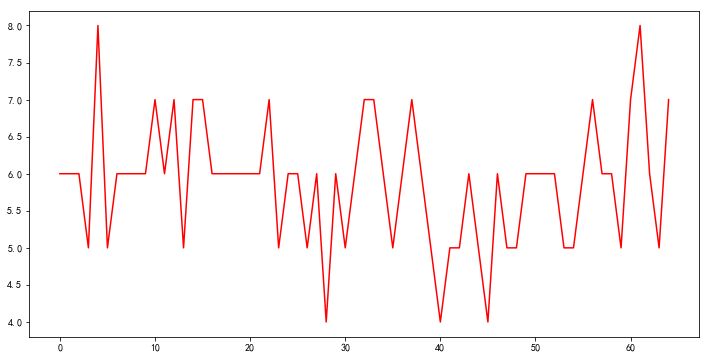

In [92]:
#lr = LinearRegression()
#Poly= PolynomialFeatures()
plt.figure(figsize=(12,6),facecolor='w')
clrs = ['b','k','g','c']
model = models[0]
x_len = np.arange(len(X_test))
plt.plot(x_len,Y_test,'r-')
for i,d in enumerate(np.arange(1,5)):
    model.set_params(Poly__degree=d)#设置多项式阶数
    model.fit(X_train,Y_train)
    
    R1 = model.score(X_train,Y_train)
    print(R1)
    Y_predict = model.predict(X_test)
    plt.plot(x_len,Y_predict,lw = 2,c = clrs[i])
plt.grid(True)